### Supervised Learning | Project - 3

###### 1.Read the column description and ensure you understand each attribute well. ( 5 points)

               ID	Customer ID
              Age	Customer's age in completed years              
        Experience	#years of professional experience
            Income	Annual income of the customer ($000)
        ZIPCode	   Home Address ZIP code.
        Family     Family size of the customer
         CCAvg	   Avg. spending on credit cards per month ($000)
         Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
          Mortgage	Value of house mortgage if any. ($000)
     Personal Loan	Did this customer accept the personal loan offered in the last campaign?
     
    Securities Account	 Does the customer have a securities account with the bank?

        CD Account	Does the customer have a certificate of deposit (CD) account with the bank?
            Online	Does the customer use internet banking facilities?
        CreditCard	Does the customer use a credit card issued by UniversalBank?

###### 2.Study the data distribution in each attribute, share your findings. (5 points)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
%matplotlib inline

In [9]:
bank_loan_data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_loan_data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [42]:
bank_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Education_1           5000 non-null uint8
Education_2           5000 non-null uint8
Education_3           5000 non-null uint8
dtypes: float64(1), int64(12), uint8(3)
memory usage: 522.5 KB


##### 3.Get the target column distribution. Your comments ( 3 points)

In [13]:
bank_loan_data = pd.get_dummies(bank_loan_data,columns=['Education'])
bank_loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [18]:
Y = bank_loan_data['Personal Loan']
X = bank_loan_data.drop(columns=['ID','ZIP Code','Personal Loan'])
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,0,1,0


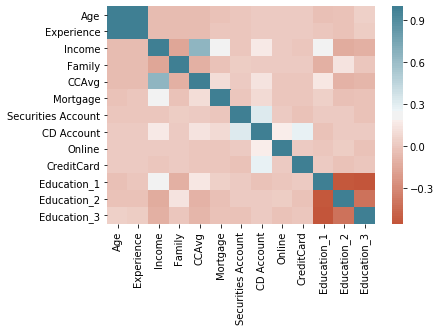

In [24]:
corr = X.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(20, 220, n=100))

##### 4.Split the data into training and test set in the ratio of 70:30 respectively (2 points)

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.70,random_state=1)

##### 5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

`KNN model for predicting the likelihood of a liability customer buying personal loans`
`We see that the model gives maximum accuracy and f1 score with k = 9, so we select k-neighbours to be 9`

In [41]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(2,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    predicted_Species = model.predict(X_test)
    print("Accuracy with k value of",k,"is",metrics.accuracy_score(Y_test,predicted_Species))
    print("f1 score with k value of",k,"is", metrics.f1_score(Y_test,predicted_Species))
    print()

Accuracy with k value of 2 is 0.9033333333333333
f1 score with k value of 2 is 0.28571428571428575

Accuracy with k value of 3 is 0.9033333333333333
f1 score with k value of 3 is 0.4357976653696498

Accuracy with k value of 4 is 0.904
f1 score with k value of 4 is 0.29411764705882354

Accuracy with k value of 5 is 0.906
f1 score with k value of 5 is 0.4337349397590362

Accuracy with k value of 6 is 0.9066666666666666
f1 score with k value of 6 is 0.339622641509434

Accuracy with k value of 7 is 0.9053333333333333
f1 score with k value of 7 is 0.4083333333333334

Accuracy with k value of 8 is 0.9053333333333333
f1 score with k value of 8 is 0.330188679245283

Accuracy with k value of 9 is 0.9093333333333333
f1 score with k value of 9 is 0.4188034188034188

Accuracy with k value of 10 is 0.908
f1 score with k value of 10 is 0.3365384615384615

Accuracy with k value of 11 is 0.9053333333333333
f1 score with k value of 11 is 0.39316239316239315

Accuracy with k value of 12 is 0.904
f1 scor

In [50]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,Y_train)
predicted_labels = KNN.predict(X_test)

`Logistic model for predicting the likelihood of a liability customer buying personal loans`

In [55]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predicted_labels_logistic = logReg.predict(X_test)

`Naive Bayes model for predicting the likelihood of a liability customer buying personal loans`

In [62]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
predicted_labels_naive = clf.predict(X_test)

##### 6.Print the confusion matrix, classification report, and accuracy for all the above models (8 points)

`confusion matrix, classification report, and accuracy for KNN model`

In [54]:
print("KNN model in predicting Potential Cutomers for Personal Loan:")
print("Accuracy Score:",metrics.accuracy_score(Y_test,predicted_labels))
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test,predicted_labels))
print("Classification Report:",metrics.classification_report(Y_test,predicted_labels))

KNN model in predicting Potential Cutomers for Personal Loan:
Accuracy Score: 0.9093333333333333
Confusion Matrix:
[[1315   36]
 [ 100   49]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.58      0.33      0.42       149

    accuracy                           0.91      1500
   macro avg       0.75      0.65      0.68      1500
weighted avg       0.89      0.91      0.90      1500



In [57]:
print("Logistic model in predicting Potential Cutomers for Personal Loan:")
print("Accuracy Score:",metrics.accuracy_score(Y_test,predicted_labels_logistic))
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test,predicted_labels_logistic))
print("Classification Report:",metrics.classification_report(Y_test,predicted_labels_logistic))

Logistic model in predicting Potential Cutomers for Personal Loan:
Accuracy Score: 0.9573333333333334
Confusion Matrix:
[[1342    9]
 [  55   94]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.63      0.75       149

    accuracy                           0.96      1500
   macro avg       0.94      0.81      0.86      1500
weighted avg       0.96      0.96      0.95      1500



In [64]:
print("Naive Bayes model in predicting Potential Cutomers for Personal Loan:")
print("Accuracy Score:",metrics.accuracy_score(Y_test,predicted_labels_naive))
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test,predicted_labels_naive))
print("Classification Report:",metrics.classification_report(Y_test,predicted_labels_naive))

Naive Bayes model in predicting Potential Cutomers for Personal Loan:
Accuracy Score: 0.8866666666666667
Confusion Matrix:
[[1243  108]
 [  62   87]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1351
           1       0.45      0.58      0.51       149

    accuracy                           0.89      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.90      0.89      0.89      1500



##### 7. Give your reasoning on which is the best model in this case and why it performs better? (7 points)

`As we see that accuracy and f1-score both are high for logostic model,so logistic model performs best in the use case.`

`Logistic Model performs best in predicting the Potential Loan Customers.
Since,the accuracy score of this model is 95.73% and we see that in the classification report the f1-score is also high. These are the reasons, we would choose logistic model here.`